# Population Genetics

This is a collection of elementary exercises that introduces you to the most fundamental concepts of population genetics. We use Python to explore these topics and solve problems.

The exercises have been chosen for a one day workshop on modeling with 2.5 hours exercises preceded by approx. 3 hours of lectures (a primer on population genetics and probability theory). Evidently, it is not possible to cover a lot of material in this time; but upon finishing this workshop, you should feel comfortable picking up a textbook on population genetics and exploring the many software packages that are available for population genetics.

__Note__: You can skip the exercises marked by an asterisk and tackle them if time permits.

## Preliminaries

All exercises can in principle be solved by only using the Python standard library and a plotting library. However, if you like and it feels more comfortable to you, you can use as well the libraries numpy and pandas. Note, that you have a link to the documentation of Python and standard scientific libraries in the "Help" menu of the Jupyter/IPython notebook.

IPython has so-called [magic commands](http://ipython.readthedocs.org/en/stable/interactive/magics.html) (starting with %) to facilitate certain tasks. In our case, we want to import libraries for efficient handling of numeric data (numpy) and for plotting data (matplotlib). Evaluate the following two commands by pressing shift+enter in the cell; they import the necessary libraries and enable inline display of figures (it make take a few seconds).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let us define two vector variables (a regular sequence and a random one) and print them.

In [2]:
x, y = np.arange(10), np.random.rand(10)
print(x, y, sep='\n')

[0 1 2 3 4 5 6 7 8 9]
[ 0.56413369  0.89773297  0.86801976  0.59831375  0.77703175  0.50338575
  0.14804271  0.37863322  0.89393793  0.85499269]


The following command plots $y$ as a function of $x$ and labels the axes using $\LaTeX$.

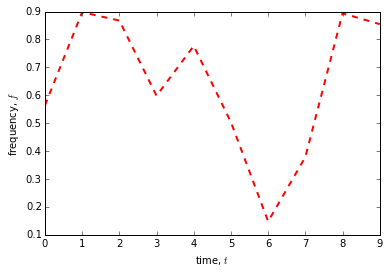

In [3]:
plt.plot(x, y, linestyle='--', color='r', linewidth=2)
plt.xlabel('time, $t$')
plt.ylabel('frequency, $f$')

From the [tutorial](http://matplotlib.org/users/pyplot_tutorial.html): "matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB."

__Comment__: The tutorial is a good starting point to learn about the most basic functionalities of matplotlib, especially if you are familiar with MATLAB. Matplotlib is a powerful library but sometimes too complicated for making statistical plots à la *R*. However, there are other libraries that, in part, are built on matplotlib and provide more convenient functionality for statistical use cases, especially in conjunction with the data structures that the library *pandas* provides (see [pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html), [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), [ggplot](http://ggplot.yhathq.com/) and many more).

## Hardy-Weinberg Equilibrium

These exercises should make you comfortable with the fundamental notions of population genetics: allele and genotype frequencies, homo- and heterozygosity, and inbreeding.

We will use data from a classical paper on enzyme polymorphisms at the alkaline phosphatase (ALP) locus in humans ([Harris 1966](http://www.jstor.org/stable/75451)). In this case, the alleles have been defined in terms of protein properties. Harris could electrophoretically distinguish three proteins by their migration speed and called them S (slow), F (fast), and I (intermediate).

We use a Python [dictionary](https://docs.python.org/3.4/library/stdtypes.html#mapping-types-dict) to store the observed numbers of genotypes at the ALP locus in a sample from the English people.

In [4]:
alp_genotype = {'obs_number':
                {'SS': 141, 'SF': 111, 'FF': 28, 'SI': 32, 'FI': 15, 'II': 5}
               }

### 1. Calculate the observed genotype frequencies at the ALP locus.

In [5]:
number = alp_genotype['obs_number']
print(number)

{'SI': 32, 'FF': 28, 'SS': 141, 'FI': 15, 'SF': 111, 'II': 5}


In [6]:
total_number = sum(list(number.values()))
print(total_number)

332


In [7]:
frequency = dict()

for genotype in number:
    frequency[genotype] = number[genotype]/total_number

print(frequency)

{'SI': 0.0963855421686747, 'FF': 0.08433734939759036, 'SS': 0.4246987951807229, 'FI': 0.045180722891566265, 'SF': 0.33433734939759036, 'II': 0.015060240963855422}


In [8]:
alp_genotype['obs_frequency'] = frequency
print(alp_genotype)

{'obs_frequency': {'SI': 0.0963855421686747, 'FF': 0.08433734939759036, 'SS': 0.4246987951807229, 'FI': 0.045180722891566265, 'SF': 0.33433734939759036, 'II': 0.015060240963855422}, 'obs_number': {'SI': 32, 'FF': 28, 'SS': 141, 'FI': 15, 'SF': 111, 'II': 5}}


### 2. Calculate the observed allele frequencies at  the ALP locus.

In [9]:
alp_allele = dict()

for allele in 'SIF':
    allele_freq = 0
    for genotype, frequency in alp_genotype['obs_frequency'].items():
        allele_freq += genotype.count(allele)/2*frequency
    alp_allele[allele] = allele_freq

In [10]:
alp_allele

{'F': 0.27409638554216864, 'I': 0.08584337349397592, 'S': 0.6400602409638554}

In [11]:
sum(list(alp_allele.values()))

1.0

### 3. Calculate the *expected* genotype frequencies if the ALP locus were in Hardy-Weinberg equilibrium.

In [12]:
alp_exp_frequency = dict()
# s**2 + i**2 + f**2 + 2*s*i + 2*s*f + 2*i*f
for genotype in alp_genotype['obs_number']:
    alleles = [allele for allele in genotype]
    exp_frequency = alp_allele[alleles[0]]*alp_allele[alleles[1]]
    if alleles[0] != alleles[1]:
        exp_frequency = 2*exp_frequency
    alp_exp_frequency[genotype] = exp_frequency
    
alp_genotype['exp_frequency'] = alp_exp_frequency

In [13]:
alp_genotype

{'exp_frequency': {'FF': 0.07512882856728116,
  'FI': 0.047058716794890404,
  'II': 0.007369084772826247,
  'SF': 0.35087639715488456,
  'SI': 0.10988986064740892,
  'SS': 0.4096771120627086},
 'obs_frequency': {'FF': 0.08433734939759036,
  'FI': 0.045180722891566265,
  'II': 0.015060240963855422,
  'SF': 0.33433734939759036,
  'SI': 0.0963855421686747,
  'SS': 0.4246987951807229},
 'obs_number': {'FF': 28, 'FI': 15, 'II': 5, 'SF': 111, 'SI': 32, 'SS': 141}}

### [$\ast$] 4. Calculate the estimate of the inbreeding coefficient $F$ for the ALP locus.

The inbreeding coefficient is defined as
$$F = 1 - \frac{h_{\mathrm{obs}}}{h_{\mathrm{exp}}},$$
where $h$ denotes the (observed and expected) frequency of heterozygotes. Can you interpret the result in simple terms?

In [14]:
obs_het, exp_het = list(), list()

for gt in alp_genotype['obs_number']:
    if len(set(gt)) == 2:
        obs_het.append(alp_genotype['obs_frequency'][gt])
        exp_het.append(alp_genotype['exp_frequency'][gt])

inbreeding_coef = 1 - sum(obs_het)/sum(exp_het)
print(inbreeding_coef)

0.06285898042858795


## Genetic Drift

Not all gametes that are produced by an organism pass over to the next generation. Due to numerous possible influences there is only a finite sample that contributes to the next generation. Therefore, not all alleles of a gene are guaranteed to appear in the next generation in proportions equal to those in the present generation. As long as we cannot specify a process that leads to a specific selection of alleles and we have no reason to believe that the allele itself has a bearing upon its selection, sampling is an *undirected* (i.e. *random*) cause of allele frequency changes in a population. We call such an undirected carry-over of genes *genetic drift*.

Genetic drift does not introduce any new assumptions compared to the Hardy-Weinberg case; it just drops the assumption of infinite population size.

### 5. Write a function that runs the Wright-Fisher model of genetic drift.

The function must at least take the following __arguments__:

* number of generations
* size of the population (i.e. number of diploid individuals)
* initial allele frequency (we have only two alleles, so considering a single allele is enough)

The function should __return__ a list (or an array if you like) that represents the trajectory of the allele over the generations.

In [15]:
import random

def drift(initial_frequency=0.5, generations=100, population_size=20):
    allele_sample_size = 2*population_size
    allele_trajectory = [initial_frequency]
    for generation in range(generations):
        allele_count = 0
        # alternative: allele_count = np.random.binomial(allele_sample_size, initial_frequency)
        for trial in range(allele_sample_size):
            if random.random() < initial_frequency:
                allele_count += 1
        new_allele_frequency = allele_count/allele_sample_size
        allele_trajectory.append(new_allele_frequency)
        initial_frequency = new_allele_frequency
    return allele_trajectory

### 6. Plot several trajectories (i.e. replicate populations) of the Wright-Fisher model and study genetic drift with different parameter values.

* What is the long-term behaviour of the locus?
* What is the effect of small/large population sizes on the trajectories?
* Do the trajectories of the replicate populations differ?
* Do rare alleles become extinct more often than abundant alleles?

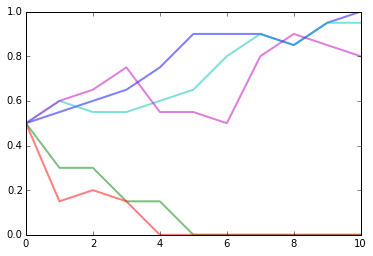

In [16]:
replicates = 5
        
for i in range(replicates):
    fA = drift(initial_frequency=0.5, generations=10, population_size=10)
    plt.plot(fA, linewidth=2, alpha=0.5)

### [$\ast$] 7. Plot the distribution of allele frequency under genetic drift. 

There is another way to look at the dynamics of a locus under genetic drift. If we have a large collection of replicate populations, we can take, at each time point, the allele frequencies of all these populations and plot a histogram. Thus, instead of looking at individual trajectories, we can observe how the *distribution* of this allele changes due to genetic drift across all replicate populations. This viewpoint of looking at a time-dependent probability density, is central for understanding the diffusion approximation to genetic drift ([Kimura 1955](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC528040/)).

Write a function that takes the output of the Wright-Fisher model, a list of generation times and plots a series of histograms of allele frequencies. What can you observe?

In [17]:
def drift_replicates(replicates=10, generations=100, initial_frequency=0.5, population_size=20):
    trajectory = np.zeros((replicates, generations + 1))
    for rep in range(replicates):
        trajectory[rep,] = drift(generations=generations,
                                 initial_frequency=initial_frequency,
                                 population_size=population_size)
    return trajectory

In [18]:
n = drift_replicates(replicates=20, population_size=10)

/home/oender/anaconda/envs/popgen/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


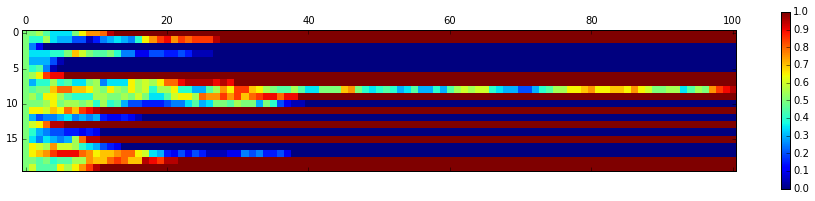

In [19]:
plt.matshow(n)
plt.colorbar()

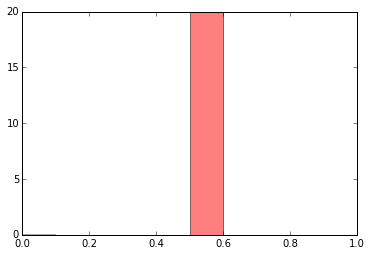

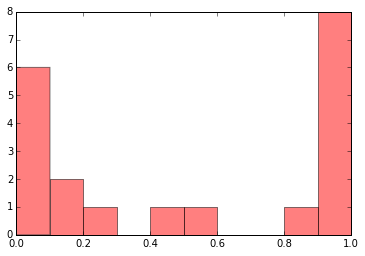

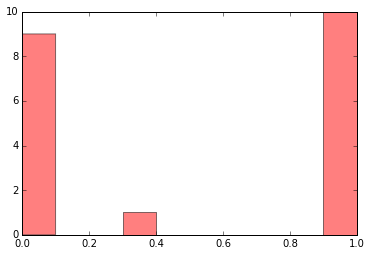

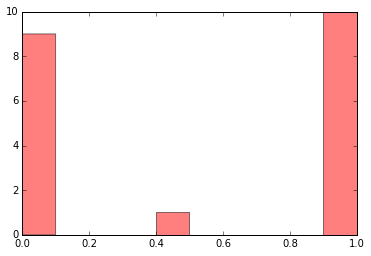

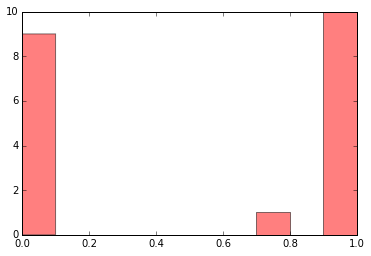

In [20]:
slices = range(0, 100, 20)
for generation in slices:
    plt.figure()
    plt.hist(n[:, generation], color='red', alpha=.5)
    

### 8. Model genetic drift as a Markov chain.

The temporal evolution of the probability distribution is actually governed by a deterministic equation, the Markov chain. To simulate it, we have to only know the transition probabilities and the initial frequencies of all possible states. Since we are looking at a population, the possible states are given by the number of reference alleles $A$; for a population of $2N$ alleles, we have the states $X(A)=0, 1, 2, \ldots, 2N$. The transition probability from $X(A)=i$ to $X(A)=j$ is given by the binomial distribution:

$$T_{ij} = \binom{2N}{j} \left(\frac{i}{2N}\right)^j \left(1-\frac{i}{2N}\right)^{2N-j}$$

* Write a function that gives the transition matrix for a given population size $N$. Tip: For an efficient implementation, you can use the binom() function from [scipy.stats](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.binom.html). How can you test if your matrix is consistent?
* For $N=4$, calculate the probability that a population with 4 copies of allele A transitions into a state with 3, 4, 5 copies. Why should these values be symmetric around 4 copy numbers? 
* Use the function [matrix_power](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.html) from numpy.linalg to compute the distribution for 19 generations with the parameters $N=16$ and initial population frequency of the reference allele of $\frac{1}{2}$. The state probability vector after $t$ transitions is given by
$$p(t) = p(0)T^t$$

In [2]:
from scipy.stats import binom

def tmatrix(N=10):
    twoN = 2*N
    states = twoN + 1
    t = np.zeros((states, states))
    j = range(0, states)
    for i in j:
        p = i/twoN
        t[i,] = binom.pmf(j, twoN, p)       
    return t

In [3]:
N = 4
T = tmatrix(N)
p0 = np.zeros(2*N + 1)
p0[N] = 1.

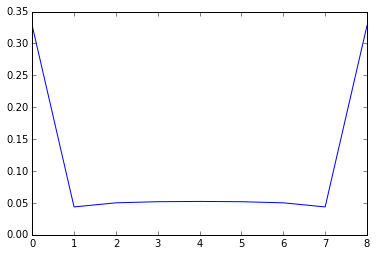

In [12]:
from numpy.linalg import matrix_power
plt.plot(np.dot(p0, matrix_power(T, 10)))

## Mutation

You have seen yourself that genetic drift removes variation from the population. Since we can observe standing variation, it is evident that genetic drift cannot be the only evolutionary force. There must be something that causes variation. To a certain extent, new variants can arise in a population due to migration, that is an influx of new alleles. However, the ultimate cause of allelic variation is mutation.

To study the interplay of drift and mutation, we will focus on the decay of heterozygosity or the dynamics of the inbreeding coefficient. With mutation, inbreeding changes according to the formula

$$ F_t = \left[ \frac{1}{2N} + \left( 1 - \frac{1}{2N} \right) F_{t-1} \right] \left( 1 - u \right)^2 $$

where $(1-u)^2$ is the probability that no mutation occured in either of the two alleles and $u$ is the mutation probability (also called mutation rate).

### 9. Simulate the dynamics of the inbreeding coefficient with and without mutation and observe the stationary state. Pick a population size not too small. Play with the number of generations.

[0, 1000, 0, 1]

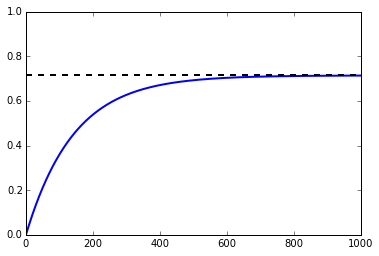

In [57]:
gen, N, u = 1000, 100, 0.001
rate = 1/(2*N)
prob = (1 - u)**2
F = [0]
for i in range(gen):
    F.append((rate + (1 - rate)*F[-1])*prob)
    
plt.plot(F, linewidth=2)
plt.axhline(1/(1+4*N*u), color='k', linestyle='--', linewidth=2)
plt.axis([0, gen, 0, 1])

## References

Gillespie (2004) *Population Genetics: A Concise Guide* The Johns Hopkins University Press

Hartl & Clark (2007) *Principles of Population Genetics* Sinauer Associates, Inc.

## Other Resources

[Genetic Simulation Resources](http://popmodels.cancercontrol.cancer.gov/gsr/)